# Linear Regression

The idea here is to fit the data points to a linear equation

> $ŷ = X w$

where $ŷ$ is a vector of predictions, $X$ represents the data points, and $w$ is a group of coefficients

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
%load_ext autoreload
%autoreload 2

In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pathlib import Path

from src.features.build_features import *
from src.models import LinearRegressor

## Data Processing

In [15]:
data_path = Path("./x11.txt")
df = pd.read_csv(data_path, sep='  ', index_col=0, skiprows=38, names=['index','rent_arable_acre', 'cows_mile^2', 'diff_pasture_arable', 'rent_grassy_acre'])

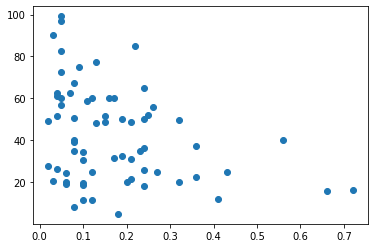

In [34]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.scatter(d[2,:], d[-1,:])
plt.show()

In [19]:
df_std = standardize_data(df)

In [20]:
X =  df_std[['rent_arable_acre', 'cows_mile^2', 'diff_pasture_arable']]
y = df_std['rent_grassy_acre']

In [30]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

## Normal Equation

We define a cost function, which will be in this case the sum of squared errors

>$J(w) = \sum (X w - y)^2$

Taking its derivative and making it equal to zero, we find values for the weights which minimize the cost function

> $X^T X w = X^T y$

can be solved for $w$ as

> $w = (X^T X)^{-1} X^T y$

In [58]:
normal_regr = LinearRegressor(method = 'normal_equation')

In [59]:
normal_regr.fit(X_train, y_train)

In [67]:
normal_regr.get_weights()

array([ 0.81615335,  0.2793202 , -0.06262018])

In [66]:
print("R2 Score: {}".format(normal_regr.score(X_test, y_test)))
print("RMSE Score: {}".format(normal_regr.score(X_test, y_test, metric = 'rmse')))

R2 Score: 0.7664618137588186
RMSE Score: 0.17194741183575674


## Gradient Descent

When the number of data points is too large, solving the normal equation might not be practical. We then perform simpler calculations to minimize the cost function step by step, updating the weights as we do it.

> $w = w + \alpha \nabla J(w)$

which is implemented in code as

> $w = w - \frac{\alpha}{m} X^T (Xw - y)$

where $\alpha$ is the learning rate, and $m$ is the number of examples in $X$

In [107]:
grad_regr = LinearRegressor(method = 'gradient_descent', lr = 0.01, epochs = 2000)

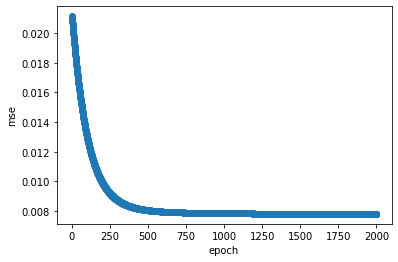

In [108]:
grad_regr.fit(X_train, y_train)

In [109]:
grad_regr.get_weights()

array([ 0.81497652,  0.28059892, -0.0645407 ])

In [110]:
print("R2 Score: {}".format(grad_regr.score(X_test, y_test)))
print("RMSE Score: {}".format(grad_regr.score(X_test, y_test, metric = 'rmse')))

R2 Score: 0.766839020537338
RMSE Score: 0.17201337859662671
